<div class="alert alert-block alert-info">
    <h2 align="center">Decision Tree</h2>
    <h4 align="center"><a href="https://t.me/afsharino">Mohammad Afshari</a></h4>
</div>

<style>
.aligncenter {
    text-align: center;
}
</style>
<p class="aligncenter">'
    <img src = "https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png"  width=70%>
</p>

# Import Libraries

In [76]:
# Scientific
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Others
import warnings

warnings.filterwarnings("ignore")

# Load Dateset

In [77]:
data = pd.read_csv('../dataset/playgolf.csv', index_col=False)

# Inspect the Data

In [78]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


# Data/Target Split

In [79]:
Y = data["Play Golf"]
X = data[data.columns.drop("Play Golf")]

# Encoding

In [80]:
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Fit model

In [81]:
clf = DecisionTreeClassifier(criterion='entropy', )
_ = clf.fit(X,Y)

# Predict new samples

In [82]:
def predict(outlook, temp, humidity, windy):
    
    new_data = pd.DataFrame([[outlook, temp, humidity, windy]])
    new_data = new_data.apply(le.transform)
    return clf.predict(new_data)

In [83]:
print(f" Today: {predict('Sunny', 'Cool', 'Normal', False)}.")

 Today: ['Yes'].


In [84]:
print(f" Tomorrow: {predict('Sunny', 'Mild', 'Normal', False)}.")

 Tomorrow: ['Yes'].


# Accuracy

In [85]:
y_pred = clf.predict(X)
acc_score = accuracy_score(Y, y_pred)

print(f"Accuracy score: {acc_score*100:.2f}")

Accuracy score: 100.00


# Plot tree

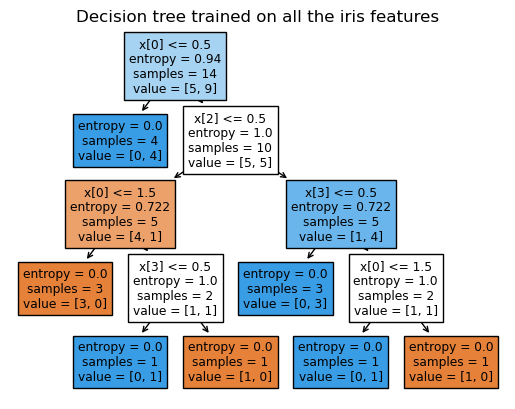

In [86]:
plt.figure()
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()